In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
import survival


<h1>Survival Analysis</h1>

Survival analysis is the examination of how long we expect something to last or continue. For example, how long do we expect someone to live after a certain diagnosis, how long we expect a customer to remain a customer, or how long we expect someone to remain at a job. 

Below, we'll load some data on turnonver. The stag column indicates how long, in months, someone has been employed; the event column indicates if they have left a company. 

In [75]:
df = pd.read_csv("data/turnover.csv",encoding = "ISO-8859-1")
df["stag"] = np.round(df["stag"])
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.0,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,23.0,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,16.0,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,16.0,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.0,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


<h4>Exercise Data</h4>

We can also load some other data that we can work on for some examples. This data is on how long someone is a customer of a phone company. 

"tenure" is the duration that they've been a customer.
"Churn" is if they've left, or if they're still there. 

In [101]:
d2 = pd.read_csv("data/churn.csv")
d2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3>Survival and CDF</h3>

The idea of survival should remind us of something we're really comfortable with - the CDF. Recall, the CDF shows us an accumulation of what percentage of all records are less than X value; if that X value is time, the CDF shows us how many things last less than X. 

Survival is the opposite of that, or more accurately, the complement. The survival is what percentage has lasted that long. Mathmatically, the survival is simple: 1-cdf(x).
<ul>
<li>S(x) = 1 - CDF(x)
</ul>

Visually, we can look at how they interact by graphing the cdf, survival, and both together. 

In [29]:
import survival
def MakeSurvivalFromCdf(cdf, label=''):
    """Makes a survival function based on a CDF.

    cdf: Cdf
    
    returns: SurvivalFunction
    """
    ts = cdf.xs
    ss = 1 - cdf.ps
    return survival.SurvivalFunction(ts, ss, label)

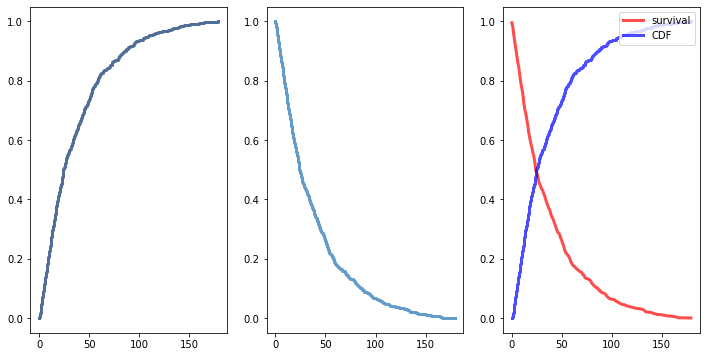

In [76]:
thinkplot.PrePlot(3,1,3)
cdf = thinkstats2.Cdf(df["stag"])
thinkplot.Cdf(cdf)
thinkplot.SubPlot(2)
thinkplot.Cdf(cdf, complement=True)
thinkplot.SubPlot(3)
sf = MakeSurvivalFromCdf(cdf)
thinkplot.Plot(sf, label='survival', color="red")
thinkplot.Cdf(cdf, color="blue", label="CDF")
thinkplot.Config()

The two sum to 1. Analytically we can also see this. 

How many employees last less/more than 24 months:

In [77]:
#Above or below 24 months
print(cdf[24])
print(sf[24])

0.5022143489813995
0.4977856510186005


<h4>Exercise - Print CDF and Survival for the Churn Data</h4>

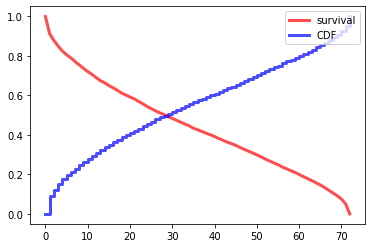

In [102]:
cdf2 = thinkstats2.Cdf(d2["tenure"])
sf2 = MakeSurvivalFromCdf(cdf2)
thinkplot.Plot(sf2, label='survival', color="red")
thinkplot.Cdf(cdf2, color="blue", label="CDF")
thinkplot.Config()

In [103]:
#Above or below 24 months
print(cdf2[24])
print(sf2[24])

0.4557716882010507
0.5442283117989493


<h3>Hazard Function</h3>

The hazard function showshow many things end or happen at any given time point of t, of all things that made it that far:
<ul>
<li>H(t) = (S(t) - S(t+1)) / S(t)
</ul>

For example, the hazard function will show: of all employees that lasted 24 months, how many ended their employment in that month. We can draw a line to make the connection a bit more clear on the chart. 

Employees that left in 24th month: 0.05387205387205399


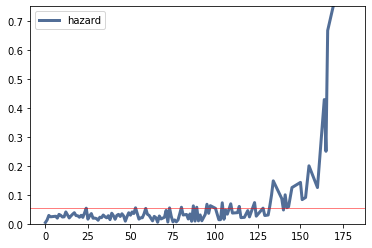

In [83]:
hf = sf.MakeHazardFunction(label='hazard')
print("Employees that left in 24th month:",hf[24])
thinkplot.Plot(hf)
thinkplot.axhline(hf[24], color="red")
thinkplot.Config(ylim=[0, 0.75], loc='upper left')

<h4>Exercise - Show Hazard Function for Churn</h4>

Customers that left in 24th month: 0.03872053872053872


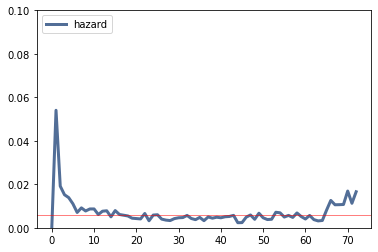

In [110]:
hf2 = sf2.MakeHazardFunction(label='hazard')
print("Customers that left in 24th month:",hf[24])
thinkplot.Plot(hf2)
thinkplot.axhline(hf2[24], color="red")
thinkplot.Config(ylim=[0, 0.1], loc='upper left')

<h3>Estimation - Kaplan-Meier</h3>

In real usage, we generally don't have all data in a nice CDF ready to go. We need to make an estimation, and there is a method to do so: Kaplan-Meier. 

KM is a commonly used function that we can use to estimate a hazard function from some data. The formula (which we don't need to worry about in detail) is:
<ul>
<li>S(t+1) = S(t)*( 1 - d/n )
<li>Where d = number that end at t, and n = total number at t. 
</ul>

To use this, we supply a list of all the things that have ended, and all those that haven't. 

In [34]:
from collections import Counter

def EstimateHazardFunction(complete, ongoing, label='', verbose=False):
    """Estimates the hazard function by Kaplan-Meier.

    http://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator

    complete: list of complete lifetimes
    ongoing: list of ongoing lifetimes
    label: string
    verbose: whether to display intermediate results
    """
    if np.sum(np.isnan(complete)):
        raise ValueError("complete contains NaNs")
    if np.sum(np.isnan(ongoing)):
        raise ValueError("ongoing contains NaNs")

    hist_complete = Counter(complete)
    hist_ongoing = Counter(ongoing)

    ts = list(hist_complete | hist_ongoing)
    ts.sort()

    at_risk = len(complete) + len(ongoing)

    lams = pd.Series(index=ts)
    for t in ts:
        ended = hist_complete[t]
        censored = hist_ongoing[t]

        lams[t] = ended / at_risk
        if verbose:
            print(t, at_risk, ended, censored, lams[t])
        at_risk -= ended + censored

    return survival.HazardFunction(lams, label=label)

Plot the hazard function using the KM estimation:

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


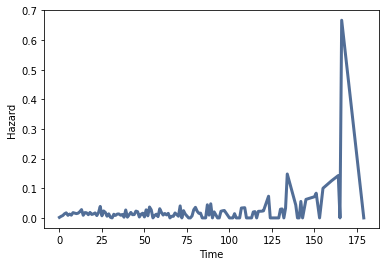

In [85]:
complete = df[df.event==1].stag
ongoing = df[df.event==0].stag

hf = EstimateHazardFunction(complete, ongoing)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Time',
                 ylabel='Hazard')

From the hazard function, we can then call a function to get the survival function. The idea is pretty simple - we know what fraction will end at any given point, as we have a survival function, so a tally of what is left is pretty conceptually simple. 

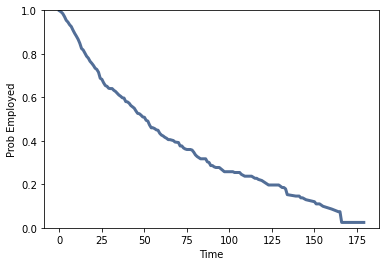

In [86]:
sf = hf.MakeSurvival()
thinkplot.Plot(sf)
thinkplot.Config(xlabel='Time',
                 ylabel='Prob Employed',
                 ylim=[0, 1])

<h4>Exercise - Generate Hazard and Survival Function with KM for Churn</h4>

Hint: May need to look at the values in the Churn column.

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


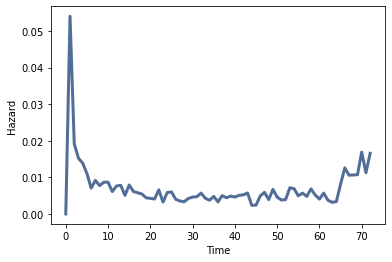

In [107]:
d2.replace(('Yes', 'No'), (1, 0), inplace=True)

complete2 = d2[d2.Churn==1].tenure
ongoing2 = d2[d2.Churn==0].tenure

hf2 = EstimateHazardFunction(complete2, ongoing2)
thinkplot.Plot(hf2)
thinkplot.Config(xlabel='Time',
                 ylabel='Hazard')

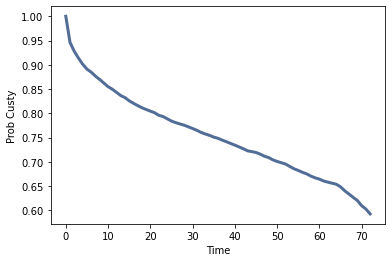

In [111]:
sf2 = hf2.MakeSurvival()
thinkplot.Plot(sf2)
thinkplot.Config(xlabel='Time',
                 ylabel='Prob Custy')

<H3>Confidence Intervals</H3>

We can use the survival and hazard information to make confidence intervals. The types of error that we are used to also exist in survival. We can use multiple samples to generate confidence just like we did with estimation. 

In [129]:
def EstimateJobSurvival(resp, columnName="stag", splitName="event"):
    """Estimates the survival curve.

    resp: DataFrame of respondents

    returns: pair of HazardFunction, SurvivalFunction
    """
    # NOTE: Filling missing values would be better than dropping them.
    tmp1 = resp[resp[splitName] == 1]
    tmp2 = resp[resp[splitName] == 0]
    complete = tmp1[columnName]
    ongoing = tmp2[columnName]

    hf = EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf

In [131]:
def ResampleSurvival(resp, iters=101, columnName="stag", color="blue", ciHi=95, ciLo=5, splitName="event"):
    """Resamples respondents and estimates the survival function.

    resp: DataFrame of respondents
    iters: number of resamples
    """ 
    _, sf = EstimateJobSurvival(resp, columnName, splitName)
    thinkplot.Plot(sf, color=color)

    low, high = resp[columnName].min(), resp[columnName].max()
    ts = np.arange(low, high)

    ss_seq = []
    for _ in range(iters):
        #sample = thinkstats2.ResampleRowsWeighted(resp, column="age")
        sample = thinkstats2.ResampleRows(resp)
        _, sf = EstimateJobSurvival(sample, columnName, splitName)
        ss_seq.append(sf.Probs(ts))

    low, high = thinkstats2.PercentileRows(ss_seq, [ciLo, ciHi])
    thinkplot.FillBetween(ts, low, high, color='gray', label=str(ciHi-ciLo))

<h4>Show Projection With Confidence Intervals</h4>

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


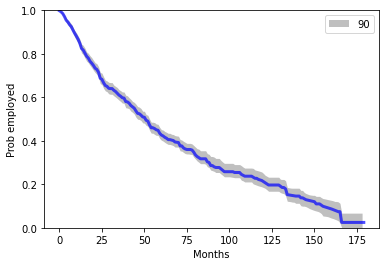

In [126]:
ResampleSurvival(df)
thinkplot.Config(xlabel='Months',
                 ylabel='Prob employed',
                 ylim=[0, 1],
                 loc='upper right')

<h4>Exercise - Draw Churn with CI of 90%</h4>

Hint: Check function arguments above. 

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


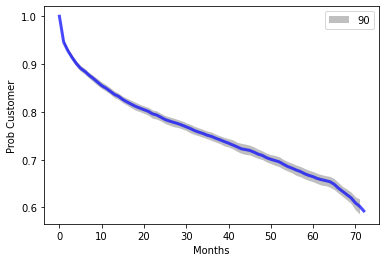

In [149]:
ResampleSurvival(d2, columnName="tenure", ciLo=5, ciHi=95, splitName="Churn")
thinkplot.Config(xlabel='Months',
                 ylabel='Prob Customer',
                 loc='upper right')

<h3>Cohort Differences</h3>

One way that survival analysis is useful is to compare groups - most notably in scenarios such as "how long does a treated group live vs a non-treated group?". 

We can split the data in any way we want, such as by sex. 

In [44]:
male = df[df["gender"]=="m"]
fem = df[df["gender"]=="f"]

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


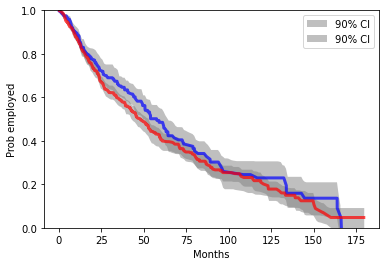

In [93]:
ResampleSurvival(male)
thinkplot.Config(xlabel='Months',
                 ylabel='Prob employed',
                 ylim=[0, 1],
                 loc='upper right')

ResampleSurvival(fem, color="red")
thinkplot.Config(xlabel='Months',
                 ylabel='Prob employed',
                 ylim=[0, 1],
                 loc='upper right',
                 color="red")

Looks like males are a tiny bit more likely to be employed at most points. 

<h4>Exercise - Split Churn Data by InternetService</h4>

In [ ]:
print(d2["InternetService"].value_counts())
fo = d2[d2["InternetService"]=="Fiber optic"]
dsl = d2[d2["InternetService"]=="DSL"]
none = d2[d2["InternetService"]==0]

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_15576/1298931125.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 

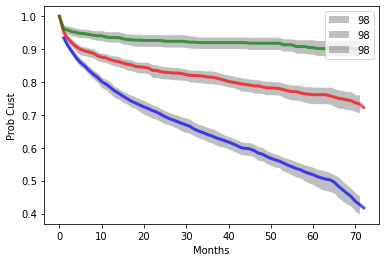

In [141]:
ResampleSurvival(fo, columnName="tenure", ciLo=1, ciHi=99, splitName="Churn")
thinkplot.Config(xlabel='Months',
                 ylabel='Prob Cust',
                 loc='upper right')

ResampleSurvival(dsl, color="red", columnName="tenure", ciLo=1, ciHi=99, splitName="Churn")
thinkplot.Config(xlabel='Months',
                 ylabel='Prob Cust',
                 loc='upper right',
                 color="red")
ResampleSurvival(none, color="green", columnName="tenure", ciLo=1, ciHi=99, splitName="Churn")
thinkplot.Config(xlabel='Months',
                 ylabel='Prob Cust',
                 loc='upper right',
                 color="red")

<h3>Remaining Lifetime</h3>

We can also estimate how long we can expect someone to "continue" - usually to not die, or continue to be a customer. 

In [67]:
def makePmf(data, filler=None):
    """Makes a PMF of lifetimes.

    filler: value to replace missing values

    returns: Pmf
    """
    cdf = thinkstats2.Cdf(data.ts, 1-data.ss)
    pmf = thinkstats2.Pmf()
    for val, prob in cdf.Items():
        pmf.Set(val, prob)

    cutoff = cdf.ps[-1]
    if filler is not None:
        pmf[filler] = 1-cutoff

    return pmf

def remLifetime(data, filler=None, func=thinkstats2.Pmf.Mean):
    """Computes remaining lifetime as a function of age.
    func: function from conditional Pmf to expected liftime
    returns: Series that maps from age to remaining lifetime
    """
    pmf = makePmf(data,filler=filler)
    d = {}
    for t in sorted(pmf.Values())[:-2]:
        pmf[t] = 0
        pmf.Normalize()
        d[t] = func(pmf) - t

    return pd.Series(d)


<h4>Estimate Remaining Lifetime at a Point</h4>

How long can we expect someone who has worked here for 24 months to continue?

Mean Remaining Emp. at 24 Months: 62.92631643227119


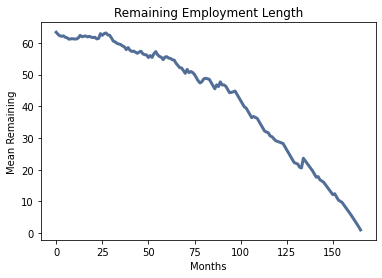

In [150]:
rem_life1 = remLifetime(sf)
print("Mean Remaining Emp. at 24 Months:",rem_life1[24])
thinkplot.Plot(rem_life1)
thinkplot.Config(title='Remaining Employment Length',
                 xlabel='Months',
                 ylabel='Mean Remaining')

We can also specify a function to replace the mean, for example we can ask for the median expected value:

Median Remaining Emp. at 24 Months: 56.0


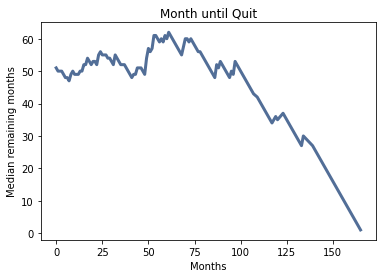

In [151]:
#Provide a generic function via the lambda
#Whatever calculation is here will replace the mean for the remaining life
func = lambda x: x.Percentile(50)
rem_life2 = remLifetime(sf, filler=np.inf, func=func)

print("Median Remaining Emp. at 24 Months:",rem_life2[24])
thinkplot.Plot(rem_life2)
thinkplot.Config(title='Month until Quit',
                 xlabel='Months',
                 ylabel='Median remaining months')

<h4>Exercises - How Long Should we Expect a Customer of 24 Months to Stay?</h4>

Mean Remaining at 24 Months: 27.92126055732917


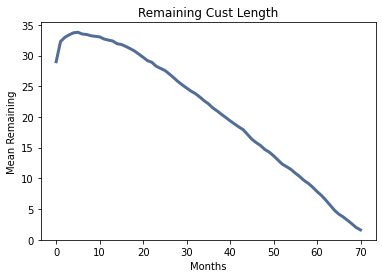

In [143]:
rem_cust = remLifetime(sf2)
print("Mean Remaining at 24 Months:",rem_cust[24])
thinkplot.Plot(rem_cust)
thinkplot.Config(title='Remaining Cust Length',
                 xlabel='Months',
                 ylabel='Mean Remaining')

<h2>Real Life and Library Functions</h2>

We created a bunch of functions here based on the book's stuff to see the details of how survival works. 

In general, we can use library functions for this:
<ul>
<li>The package "lifelines" has most of this stuff in ready to go formats. (You'd likely need to install it)
<li>When using a scipy function, there is normally a survival function built in, normally sf.
</ul>